# Exploratory data analysis (EDA)
# 2 - Bank Marketing Data Set

## About Dataset

#### Context
Data set is taken from [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

### Columns
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the last contact of the current campaign:
8.  contact: contact communication type (categorical: 'cellular','telephone')
9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10.  dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
20.  nr.employed: number of employees - quarterly indicator (numeric)
21.  subscribed : has the client subscribed a term deposit? (binary: 'yes','no')

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame

In [12]:
df = pd.read_csv('bank_marketing_dataset.csv', sep=',')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

## Renaming names of columns
 - they have . in names (syntax in python)
 - renaming from . to _

In [13]:
df.rename(columns=
{
    "emp.var.rate": "emp_var_rate", 
    "cons.price.idx": "cons_price_idx", 
    "cons.conf.idx": "cons_conf_idx",
    "nr.employed": "nr_employed"
}, inplace=True)

df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

## Structural information

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Categorical columns

In [14]:
cols_categories = df.select_dtypes(exclude=np.number).columns
cols_categories

for col in cols_categories:
    print(col)
    print(df[col].unique().tolist())

job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
marital
['married', 'single', 'divorced', 'unknown']
education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
default
['no', 'unknown', 'yes']
housing
['no', 'yes', 'unknown']
loan
['no', 'yes', 'unknown']
contact
['telephone', 'cellular']
month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']
poutcome
['nonexistent', 'failure', 'success']
subscribed
['no', 'yes']


## Numeric columns

In [15]:
cols_numeric = df.select_dtypes(include=np.number).columns
cols_numeric

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

### The columns fits with the source
### Our dataset consists of 5 numerical variables and 11 categorical variables.

## Check if there are None or numpy.NaN or empty string '' or numpy.inf

In [20]:
pd.options.mode.use_inf_as_na = True
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

### There are no zero values

## Description of dataset

### Categorical columns

In [33]:
df.describe(include=['object']).T

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
subscribed   41188      2                 no  36548

### Numeric columns

In [32]:
df.describe(include=['number']).T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp_var_rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons_price_idx  41188.0    93.575664    0.578840    92.201    93.075   
cons_conf_idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr_employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp_var_rate       1.100     1.400     1.400  
cons_price_idx    93.749    93.994    94.767  
cons_conf_idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr_employed     5191.000  5228.100  5228.100

# Data analysis

### Hypothesis
- Does age, job and education have affect whether client signed up?
- Does contact communication type have affect whether client signed up?
- Were more clients signed up who were not previously contacted?
- Which target group was contacted the most?
- Are there more subscribed clients who have the result of the campaign as a success?

### Showing subscribed and non subscribed

In [65]:
df_subscribed = df.groupby("subscribed").subscribed.count().reset_index(name="count")
df_subscribed

subscribed  count
0         no  36548
1        yes   4640

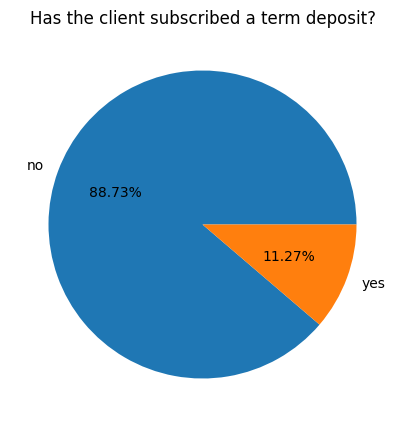

In [69]:
fig = plt.figure(figsize=(10, 5))
plt.pie(data=df_subscribed, x="count", labels="subscribed",  autopct='%1.2f%%')
plt.title("Has the client subscribed a term deposit?")
plt.show()

### Visualization clients counts by Age

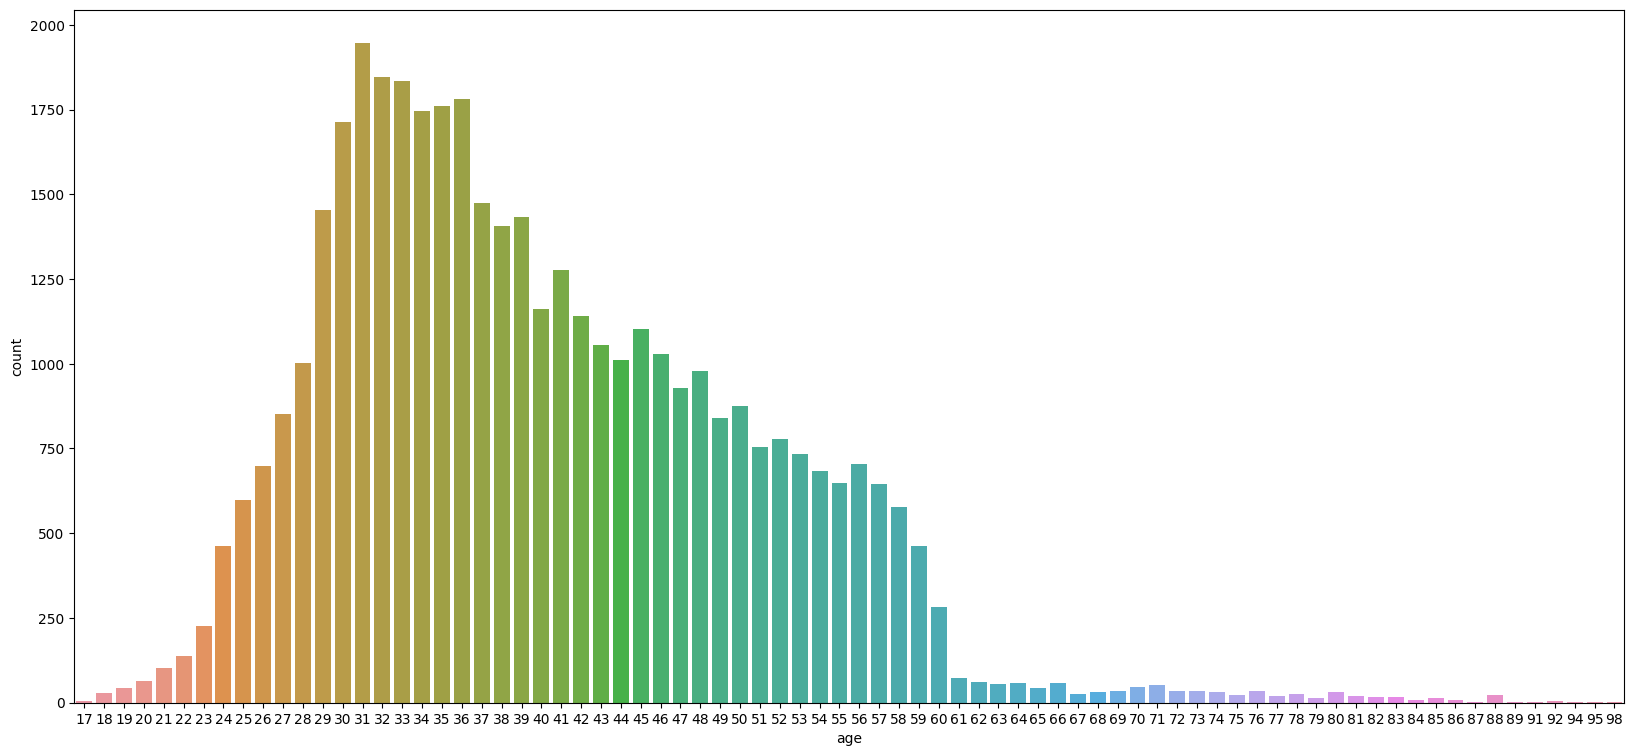

In [104]:
df_age_counts = df.groupby("age").age.count().reset_index(name="count")
df_age_counts

fig = plt.figure(figsize=(20, 9))
sns.barplot(data=df_age_counts, x='age', y = 'count')
plt.show()

### Visualization between age and subscribed

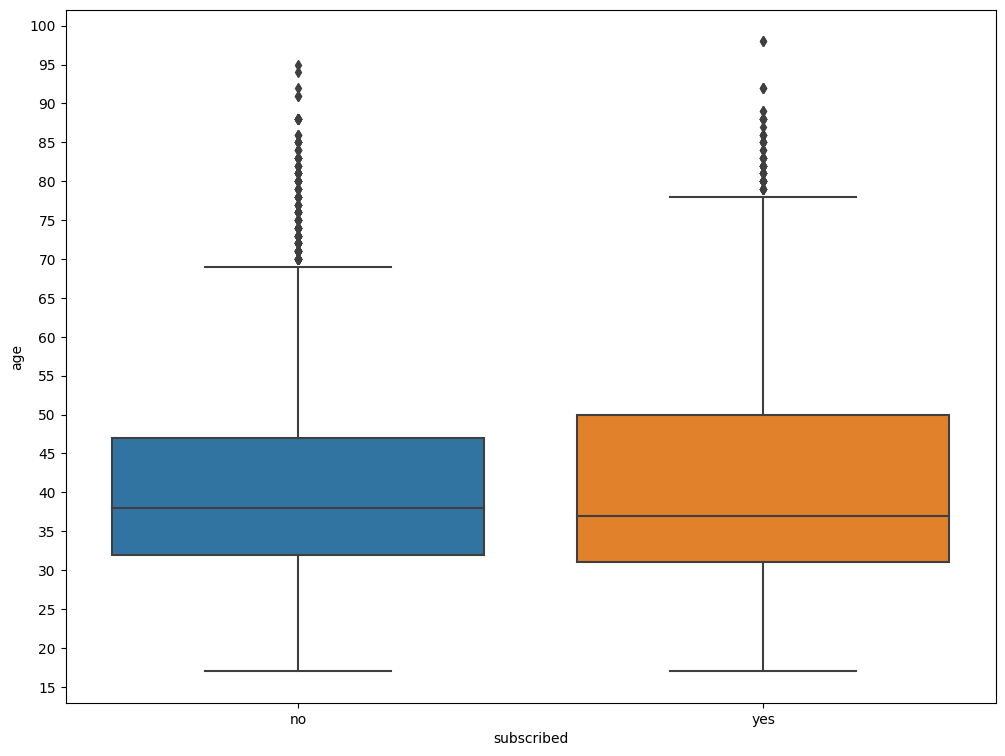

In [117]:
fig = plt.figure(figsize=(12, 9))
fig = plt.locator_params(nbins = 30)
sns.boxplot(data = df, y = 'age', x = 'subscribed')
plt.show()

- Biggest group of subscribed is between 32 and 48
- Biggest group of not subscribed is between 34 and 47 

### Visualization clients counts by their job and education

In [119]:
df_job_count = df.groupby(['job', 'subscribed']).job.count().reset_index(name="count")

df_education_count = df.groupby(['education', 'subscribed']).education.count().reset_index(name="count")



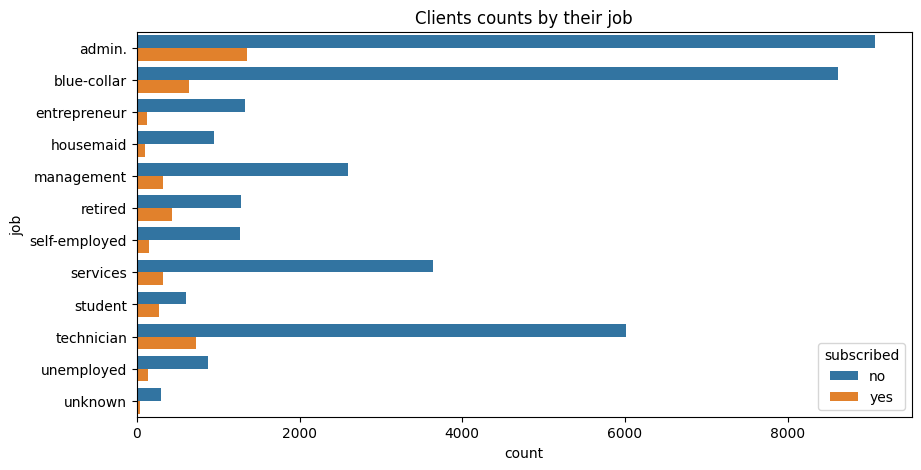

In [123]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=df_job_count, y='job', x='count', hue='subscribed')
plt.title("Clients counts by their job")
plt.show()

- The most common job is admin and blue-collar.
- The most frequent clients who have subscribed work as is admin, technician, blue-collar, retired.

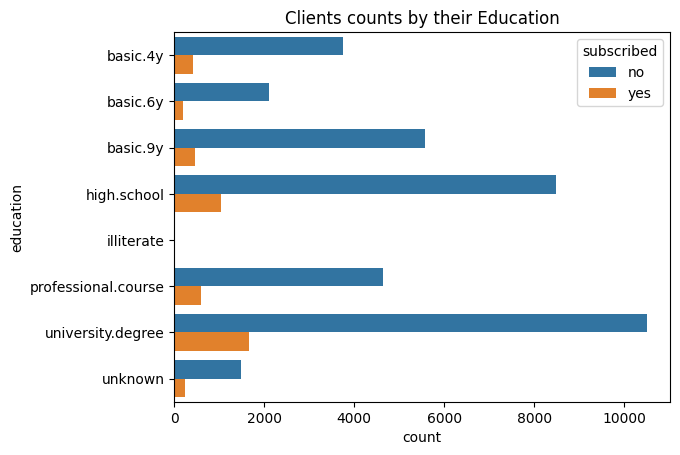

In [125]:
sns.barplot(data=df_education_count, y='education', x='count', hue='subscribed')
plt.title("Clients counts by their Education")
plt.show()

- The most common education is university degree and high school.
- The most frequent clients who have subscribed studied university or high school or professional course. 

### Does contact communication type have affect whether client signed up?


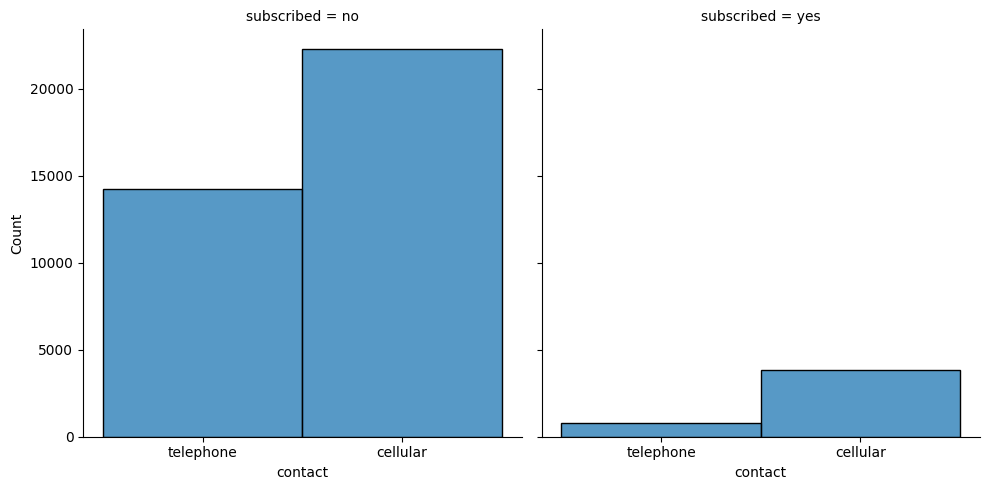

In [143]:
sns.displot(data = df, x = 'contact', col='subscribed')
plt.show()

- Most of the clients who subscribed were asked via cellular

### Are there more subscribed clients who have the result of the campaign as a success?

<Figure size 1200x900 with 0 Axes>

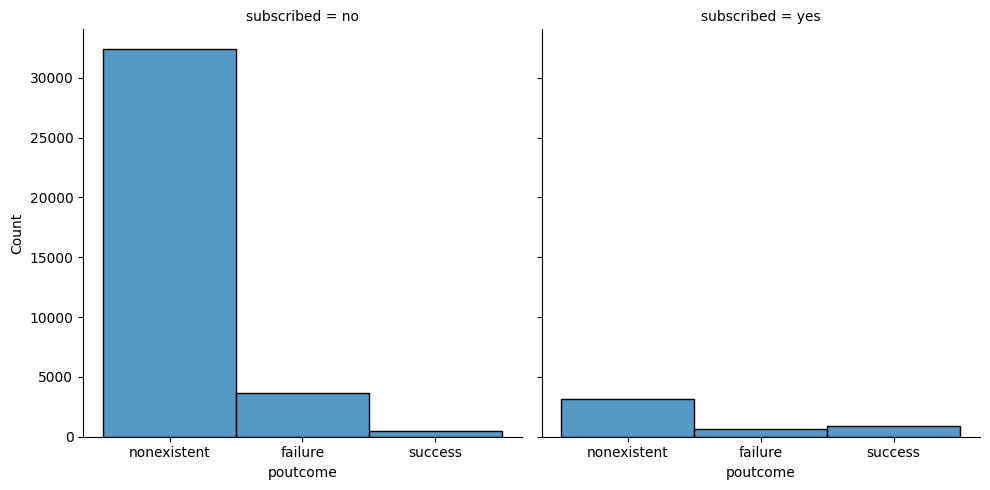

In [151]:
fig = plt.figure(figsize=(12,9))
sns.displot(data = df, x = 'poutcome', bins=20, col='subscribed')
plt.show()

- Yes, there are more subscribed clients, who have the result of the campaign as success
- We can see that, if the campaign was unsuccessful or nonexistent, not many people subscribed.

### Visualization clients by their Marital status

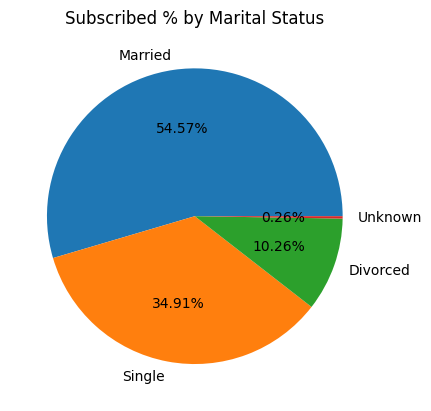

In [174]:
marital_subs1 = df.loc[df['subscribed'] == "yes"]
marital_subs1 = list(marital_subs1['marital'].value_counts().values)
labels1 = ["Married","Single","Divorced", "Unknown"]
plt.pie(marital_subs1,labels=labels1, autopct='%1.2f%%')
plt.title("Subscribed % by Marital Status")
plt.show()

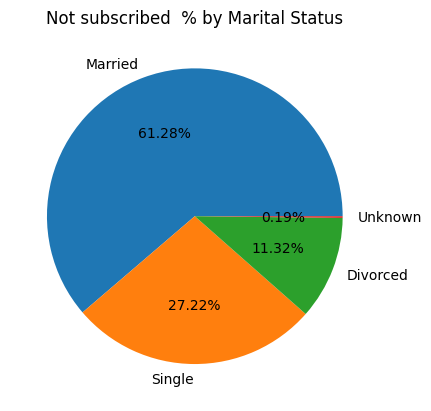

In [182]:
marital_subs2 = df.loc[df['subscribed'] == "no"]
marital_subs2 = list(marital_subs2['marital'].value_counts().values)
labels1 = ["Married","Single","Divorced", "Unknown"]
plt.pie(marital_subs2,labels=labels1, autopct='%1.2f%%')
plt.title("Not subscribed  % by Marital Status")
plt.show()

- There is no difference between subscribed and not subscribed

### Categorical data analysis

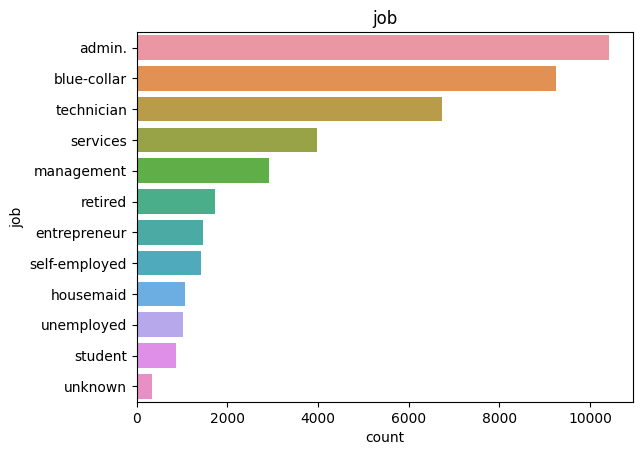

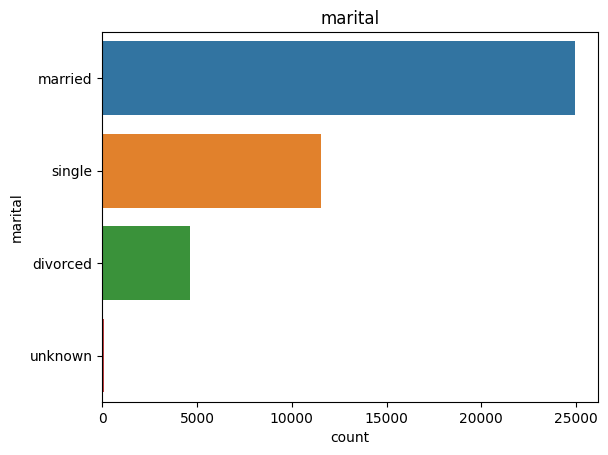

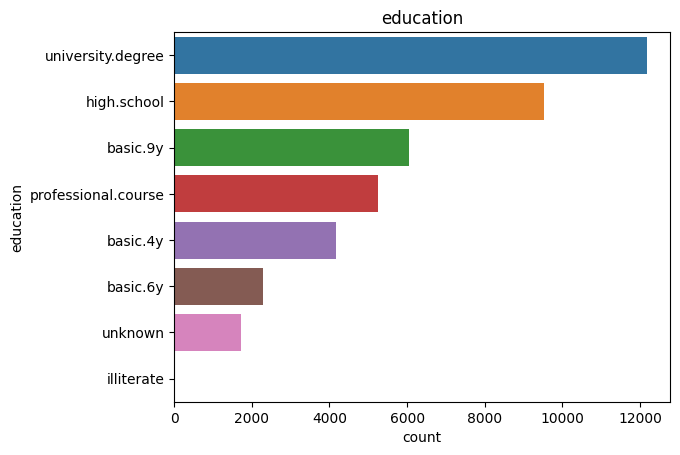

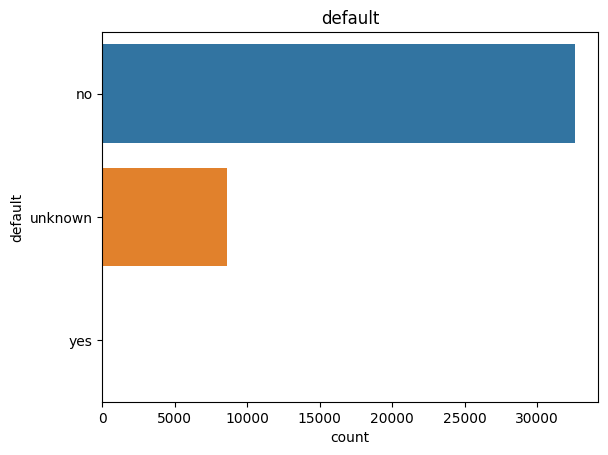

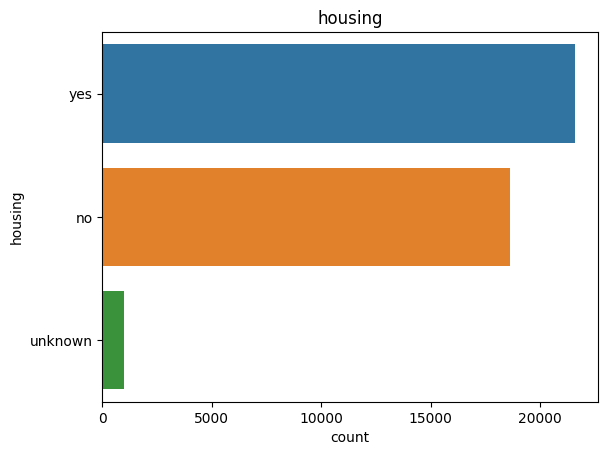

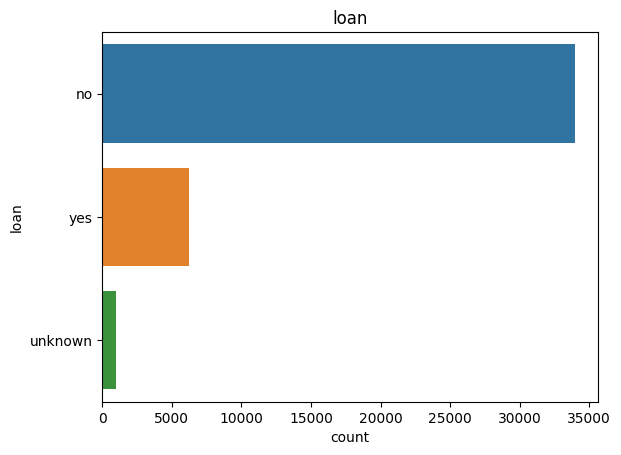

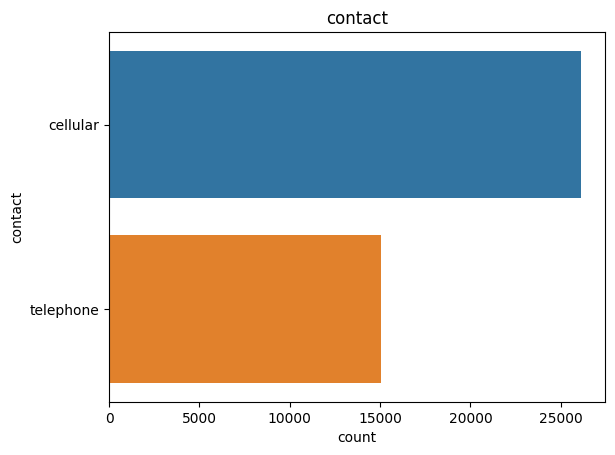

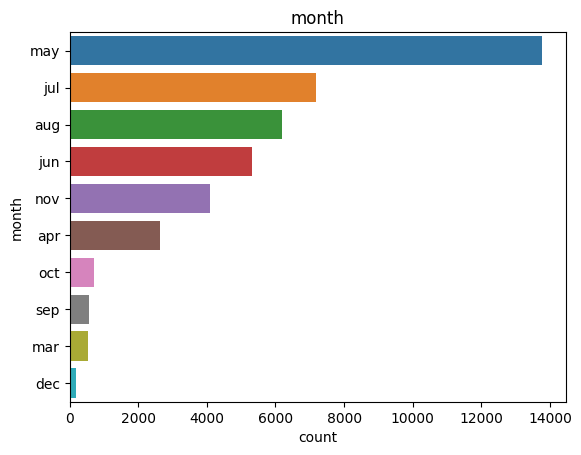

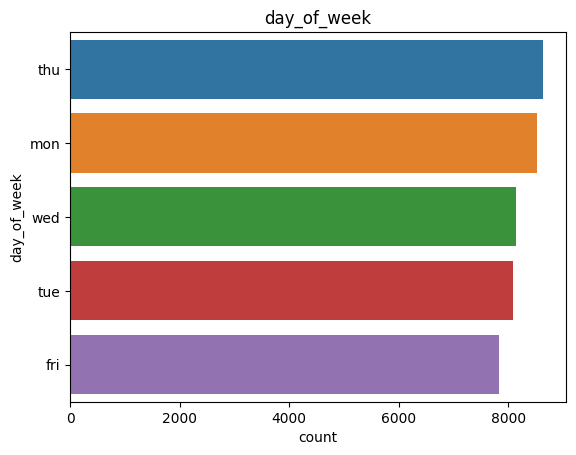

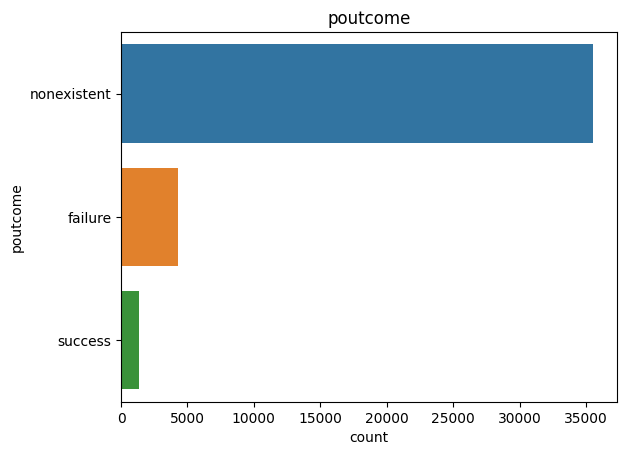

In [157]:
cols_categories = cols_categories.drop("subscribed")
for column in cols_categories:
    tmp = df.value_counts(column).reset_index(name="count")
    sns.barplot(data=tmp, x= 'count', y= column).set_title(column)
    plt.show()

- The least are students and unknown
- There are more married than single and single than divorced.
- The most number of education is university degree and highschool.
- No one has credit in default.
- Most people have housing loan
- Most people do not have personal loan.
- The most contacts per month were in May and July.
- For the most part, clients were not contacted by the previous campaign.

### Lets check for correlated data

C:\Users\asus\AppData\Local\Temp\ipykernel_19356\402430162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_data = df.corr()


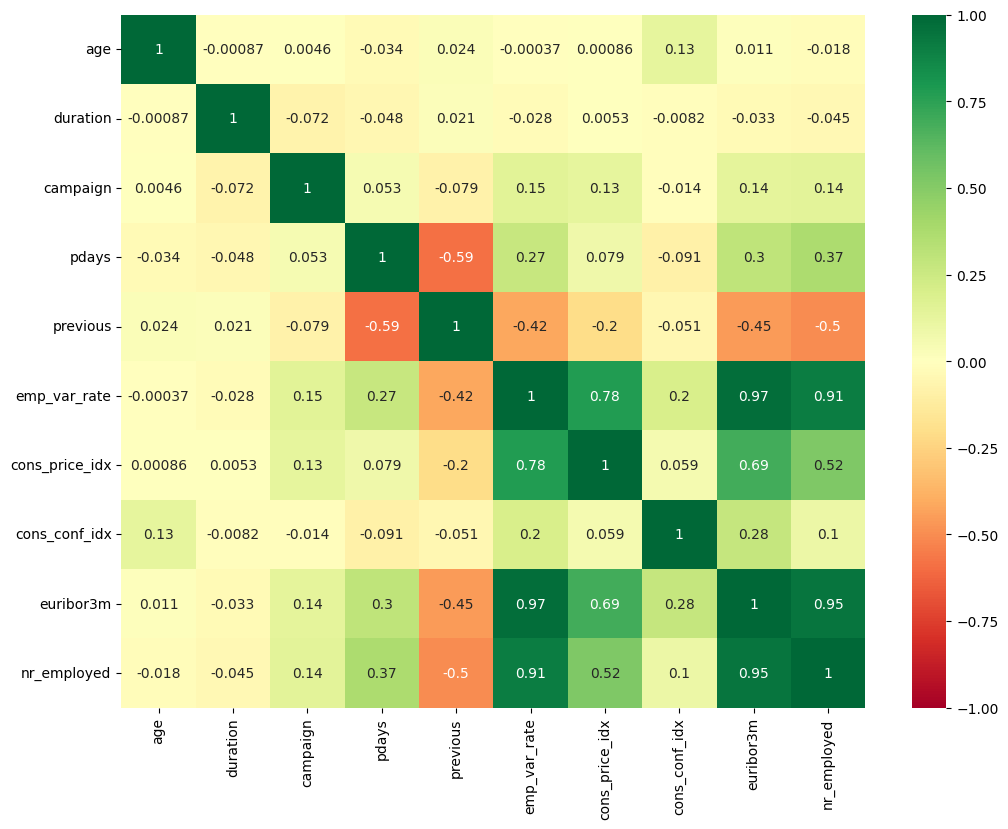

In [175]:
correlated_data = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlated_data, cmap="RdYlGn", annot=True, vmin=-1,vmax=1)
plt.show()

#### Variables that are highly correlated:
- **euribor3m** and **nr_employed**
- **euribor3m** and **emp_var_rate**
- **nr_employed** and **emp_var_rate**
- **cons_price_idx** and **emp_var_rate**

### Social and economic columns visualization

In [176]:
social_economic_columns = ["euribor3m","cons_price_idx", "cons_conf_idx", "emp_var_rate", "subscribed", "nr_employed"]
df[social_economic_columns].corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_19356\3010482844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[social_economic_columns].corr()


euribor3m  cons_price_idx  cons_conf_idx  emp_var_rate  \
euribor3m        1.000000        0.688230       0.277686      0.972245   
cons_price_idx   0.688230        1.000000       0.058986      0.775334   
cons_conf_idx    0.277686        0.058986       1.000000      0.196041   
emp_var_rate     0.972245        0.775334       0.196041      1.000000   
nr_employed      0.945154        0.522034       0.100513      0.906970   

                nr_employed  
euribor3m          0.945154  
cons_price_idx     0.522034  
cons_conf_idx      0.100513  
emp_var_rate       0.906970  
nr_employed        1.000000

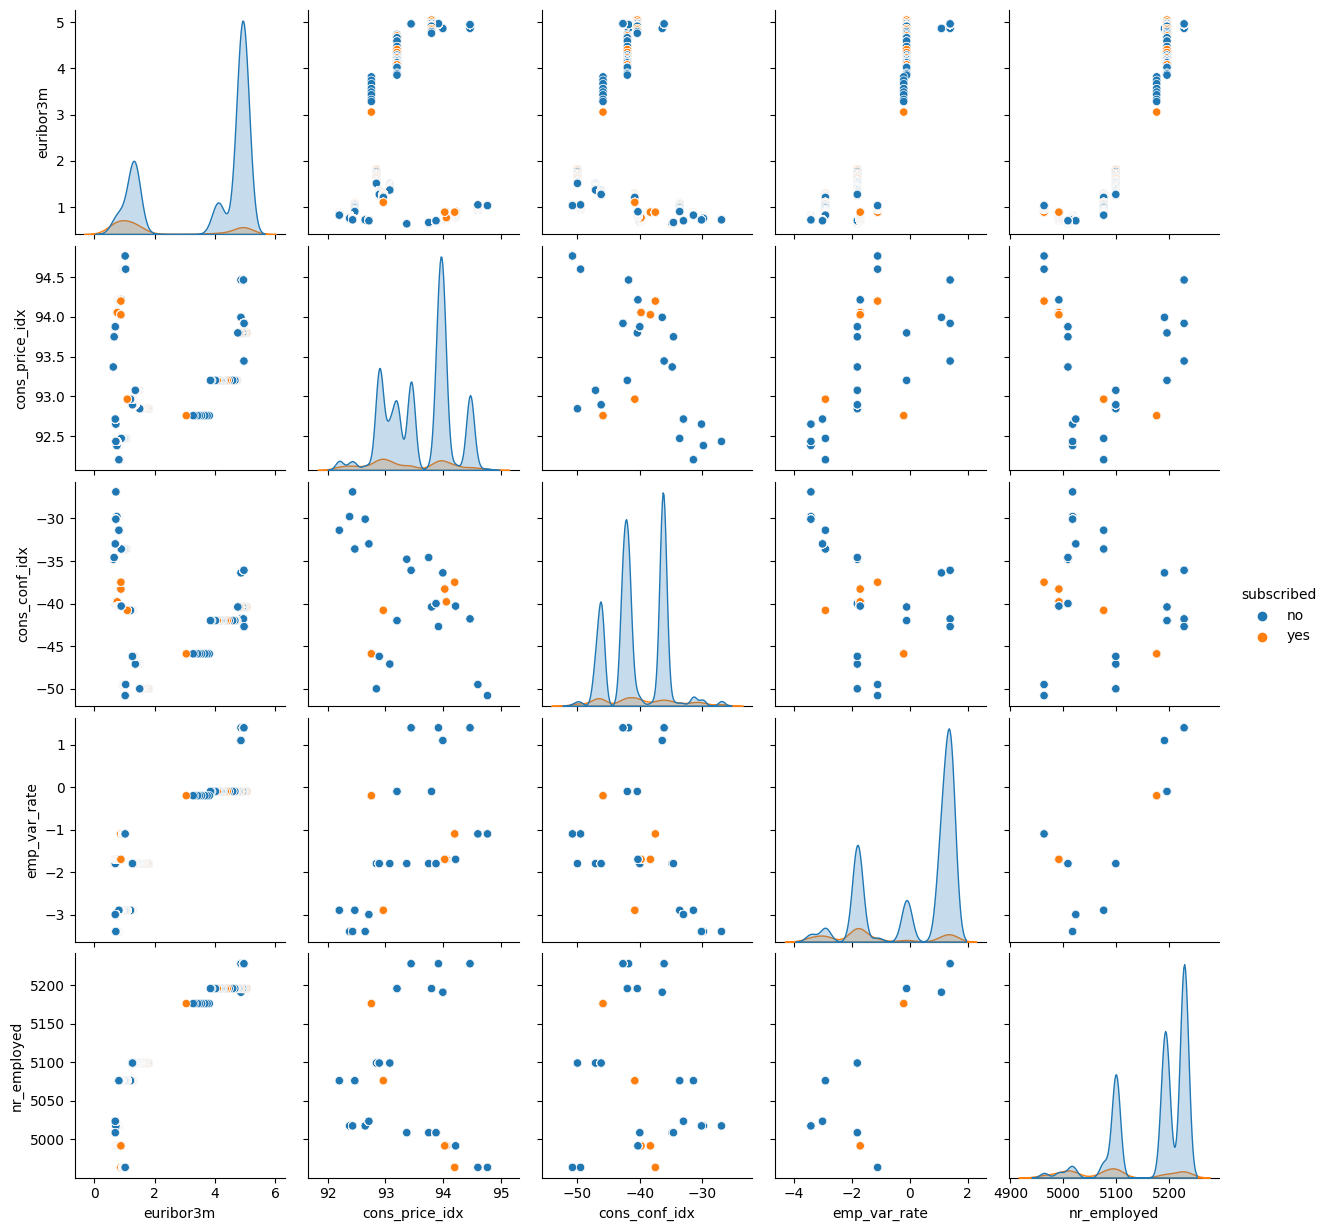

In [177]:
sns.pairplot(df[social_economic_columns], hue="subscribed")
plt.show()

the **euribor3m** grows when **nr_employed** and **emp_var_rate** grow

### Visualization histograms of numeric columns

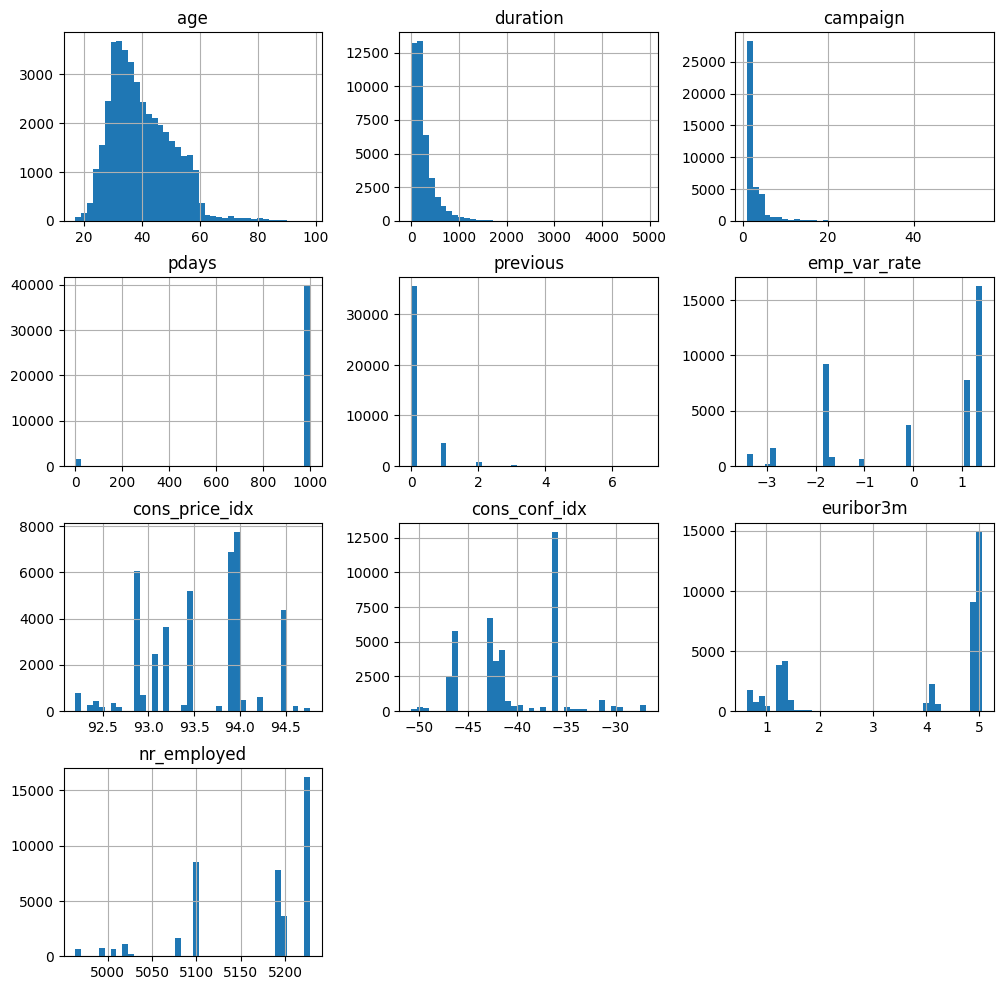

In [178]:
df[cols_numeric].hist(figsize=(12,12),bins=40)
plt.show()

### Visualization boxplots of numeric columns

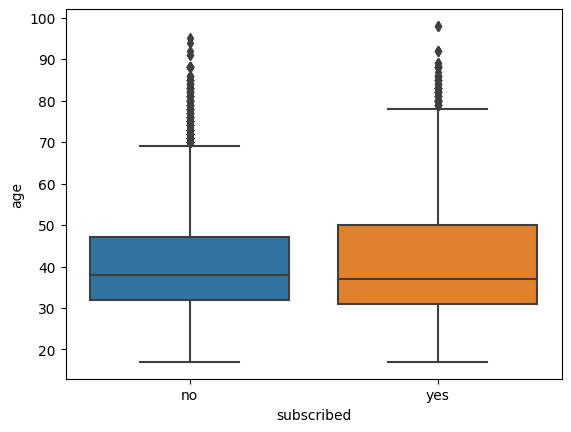

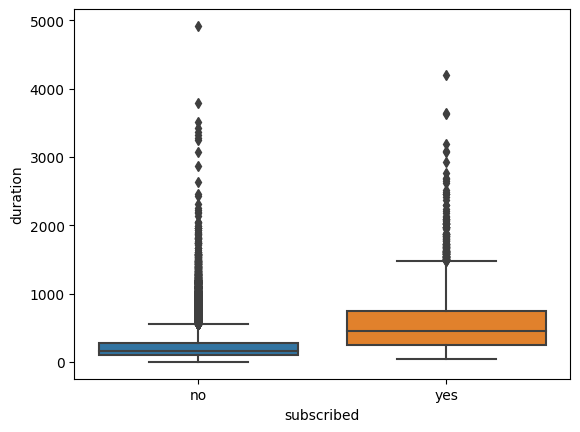

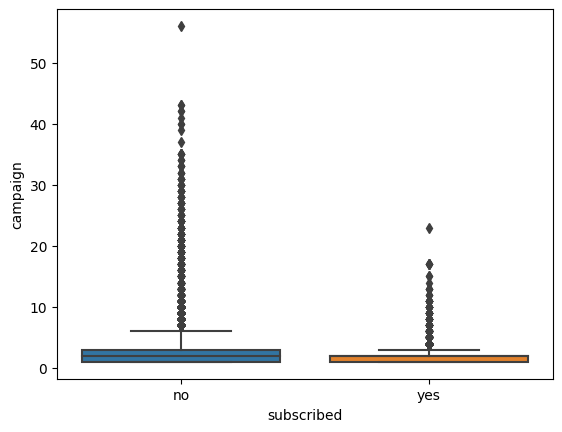

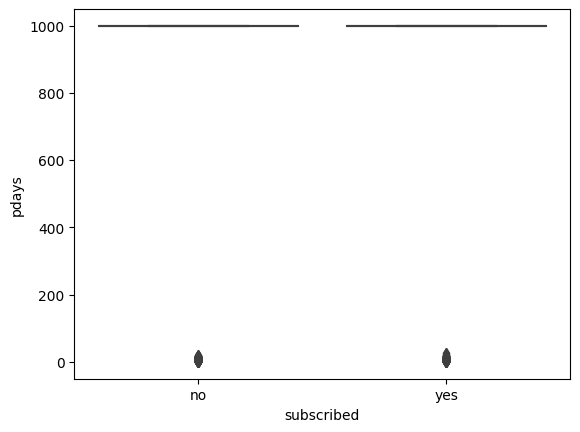

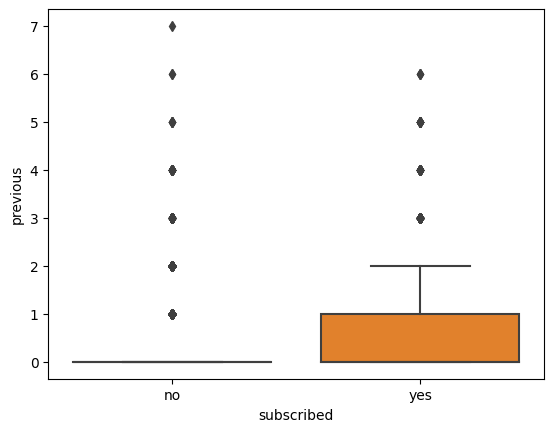

In [180]:
cols_numeric_cut = cols_numeric.drop(["euribor3m","cons_price_idx", "cons_conf_idx", "emp_var_rate","nr_employed"])
for col in cols_numeric_cut:
    sns.boxplot(data=df, x="subscribed", y=df[col])
    plt.show()

- Clients, who have more frequent or longer duration, subscribed more.

### PDays

In [181]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most clients (39673) has value 999 that means client was not previously contacted

# Summary

- Most clients was not previously contacted
- Most of the subscribed clients have a higher education
- The most frequent clients who have subscribed work as subscribed is admin, technician, blue-collar, retired.
- Most clients are in the middle age group (30-50)
- If previous campaign was unsuccessful or nonexistent, not many people subscribed.
- No one has credit in default
- Most clients signed up by cellular
- There is not difference between subscribed and not subscribed in marital status
- The most clients were contacted in May, the least in December